In [1]:
from scipy.sparse import dok_matrix
from bidict import bidict

import sys
sys.path.insert(0, "../")
import farkas
from farkas.model import MDP

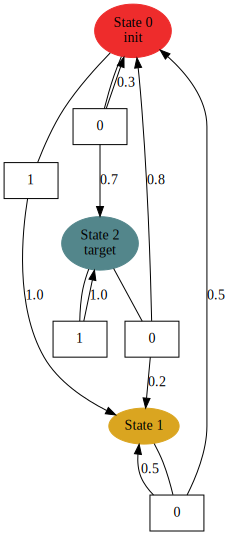

In [2]:
index_by_state_action = bidict({})
index_by_state_action[(0,0)] = 0
index_by_state_action[(0,1)] = 1
index_by_state_action[(1,0)] = 2
index_by_state_action[(2,0)] = 3
index_by_state_action[(2,1)] = 4

P = dok_matrix((5,3))

P[0,0], P[0,2] = 0.3, 0.7
P[1,1] = 1
P[2,0], P[2,1] = 0.5, 0.5
P[3,0], P[3,1] = 0.8, 0.2
P[4,2] = 1

labels = {  "target": set({2}),
            "init"  : set({0})}

mdp = MDP(P, index_by_state_action, labels)
mdp.digraph()

{0: 0, 1: 1, 2: 2}


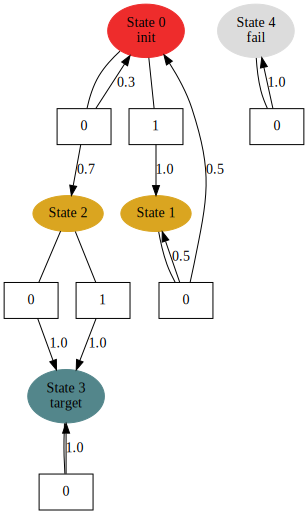

In [3]:
reachability_form, mapping = mdp.reachability_form("init","target")
print(mapping)
mdpr = MDP.from_reachability_form(reachability_form)
mdpr.digraph()